In [1]:
#pwd

In [3]:
##4
import numpy as np
import pandas as pd
from time import time
import visuals as vs
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
##5
data = pd.read_csv('datasal.csv')

In [5]:
##6
data.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


###### #8
###### age:
גיל כל פרט כאשר הוא משתנה כמותי
###### workclass:
משתנה תעסוקתי וסוג משרה של הפרט כאשר הוא מצויין במילים-משתנה נומינלי
###### education_level:
דרגת השכלה , זה מממש כל פרט לאיזה דרגה השכלה הגיע בשנים, או תארים וכו   
###### education-num:
מספר שנות השכלה 
###### marital-status:
מצב נשואין  
###### occupation:
מקצועי
###### relationship:
מצב משפחתי משתנה נומינלי
###### race:
גזע 
###### sex:
מין 
###### capital-gain:
רווח הון 
###### capital-loss:
הפסד הון 
###### hours-per-week:
שעות פר שבוע 
###### native-country:
ארץ מולדת מודדים אותו דרך משתנה נומינלי 
###### income:
רווח הפרט מצויין כמעל  50אלף דולר אן פחות

In [6]:
##9
len(data)

45222

In [7]:
##10
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


##### a.
age _ hatsyon(median): 37.000000

##### b.
education-num _ ahozon 75: 13.000000

##### c.
capital-gain is <span style="color: red"> skew  </span> not normal distrubtion.
If we take a look at the median (50%) and average(mean) they are very far from each other which is a good sign
that it can't be normal distribution.
In normal distribution, median 50% and mean(average) values should be close to each other
also we did a hostpgram to confirm that

##### d.
hours-per-week is close to <span style="color: red"> normal distribution. </span>
If we take a look at the median (50%) and average(mean) values they are very close to each other which is a good sign
that it can be a normal distribution.
also we did a histogram to confirm that


In [8]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
cg = data['capital-gain']

<AxesSubplot:>

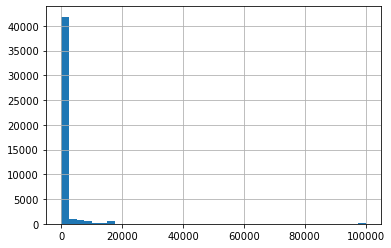

In [10]:
cg.hist(bins=40)

In [11]:
hpw = data['hours-per-week']

<AxesSubplot:>

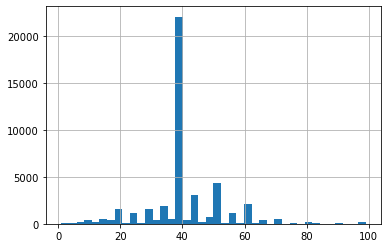

In [12]:
hpw.hist(bins=40)

<AxesSubplot:>

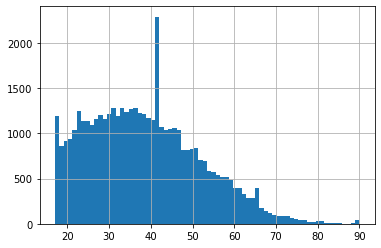

In [13]:
##11
data['age'].hist(bins=70)

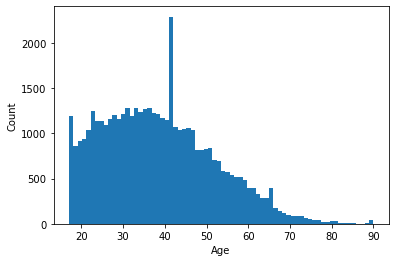

In [14]:
plt.hist(data['age'], 70)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [15]:
##12
overFifty = (data['income'] == '>50K').sum()  ##num of people income over 50K
overFifty

11208

In [16]:
mespar_shorot = len(data)
mespar_shorot

45222

In [17]:
overFiftyPercentage = overFifty / mespar_shorot
overFiftyPercentage

0.2478439697492371

### אחוז האנשים אשר מרוויחים מעל 50 אלף דולרים
### 24.78439697492371 %

In [18]:
##13
divorcedNum = (data['marital-status'].str.contains("Divorced", case=True)).sum()
divorcedNum

6297

### מספר האנשים הגרושים
### 6297

<h3 style="color:Red"> #14 Heat Map </h3>

In [19]:
#14 - heatmap
hp_data = data.select_dtypes(include=np.number)    #heatmap data (get numerical columns only using numpy function)
index_list = [206,8123,33112,45120,10000]
hp_data = hp_data.loc[hp_data.index[index_list]]    #decrease dataframe to only selected indexes
hp_data

,age,education-num,capital-gain,capital-loss,hours-per-week
206,90,9,0,2206,40
8123,39,13,15024,0,99
33112,53,11,99999,0,75
45120,64,16,0,0,45
10000,23,10,0,0,25


In [20]:
indexes = hp_data.index    #copy indexes
ahozanem = hp_data.columns    #copy columns names

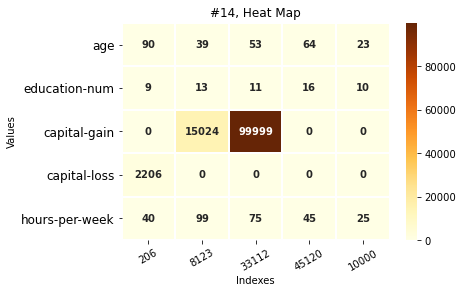

In [21]:
#heatmap
ax = sns.heatmap(hp_data.T, cmap="YlOrBr", annot=True, fmt='.0f', linewidth=1, annot_kws={'fontweight' : 'bold'})

#label names customization
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)

ax.set_title('#14, Heat Map')
ax.set(xlabel='Indexes', ylabel='Values')

plt.show()

#15
#### a. 33112 & 8123 have very high capital gain relative to other indexes in the dataframe
#### b. 206 & 45120 both have zero capital gain

In [22]:
#16
income_raw = data['income']
features_raw = data.drop('income', axis=1)

In [23]:
income_raw

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object

In [24]:
features_raw

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
45218,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
45219,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
45220,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


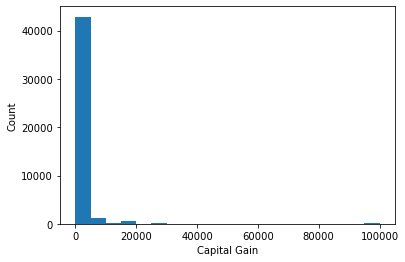

In [25]:
#17
#capital gain histogram
plt.hist(data['capital-gain'], 20)
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

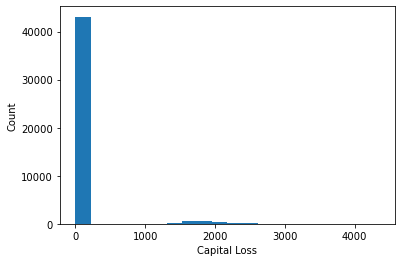

In [26]:
#capital loss histogram
plt.hist(data['capital-loss'], 20)
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

array([[<AxesSubplot:xlabel='capital-gain', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='capital-gain'>],
       [<AxesSubplot:xlabel='capital-gain', ylabel='capital-loss'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='capital-loss'>]],
      dtype=object)

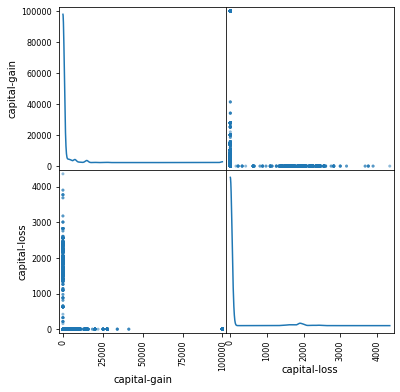

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['capital-gain','capital-loss']], figsize=(6,6),diagonal='kde')

In [28]:
#18
skewed = ['capital-gain', 'capital-loss']

In [29]:
features_log_transformed = pd.DataFrame(features_raw)

In [30]:
features_log_transformed

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
45218,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
45219,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
45220,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [31]:
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

In [32]:
features_log_transformed[skewed]

,capital-gain,capital-loss
0,7.684784,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
45217,0.000000,0.0
45218,0.000000,0.0
45219,0.000000,0.0
45220,8.604471,0.0


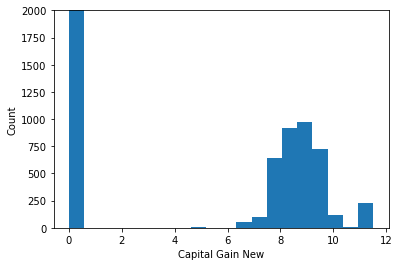

In [33]:
#capital gain histogram after normalization
plt.hist(features_log_transformed['capital-gain'], 20)
plt.xlabel('Capital Gain New')
plt.ylabel('Count')
plt.ylim(ymax=2000)
plt.show()

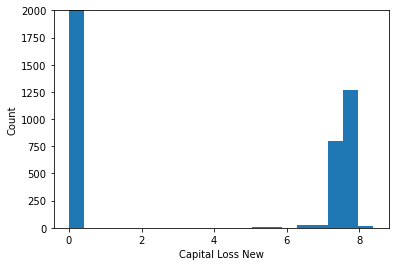

In [34]:
#capital loss histogram after normalization
plt.hist(features_log_transformed['capital-loss'], 20)
plt.xlabel('Capital Loss New')
plt.ylabel('Count')
plt.ylim(ymax=2000)
plt.show()

In [35]:
"""
skewed = ['capital-gain', 'capital-loss']
#features_log_transformed = pd.DataFrame(features_raw)
#features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
plt.hist(features_log_transformed[skewed])
plt.ylim(ymax=2000)
"""

"\nskewed = ['capital-gain', 'capital-loss']\n#features_log_transformed = pd.DataFrame(features_raw)\n#features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))\nplt.hist(features_log_transformed[skewed])\nplt.ylim(ymax=2000)\n"

array([[<AxesSubplot:xlabel='capital-gain', ylabel='capital-gain'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='capital-gain'>],
       [<AxesSubplot:xlabel='capital-gain', ylabel='capital-loss'>,
        <AxesSubplot:xlabel='capital-loss', ylabel='capital-loss'>]],
      dtype=object)

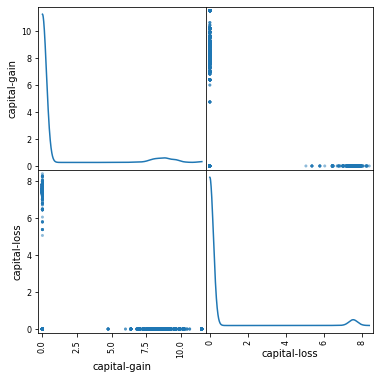

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(features_log_transformed[skewed], figsize=(6,6),diagonal='kde')
#plt.ylim(ymax=2000)

In [37]:
features_log_transformed[skewed].describe()

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,0.740759,0.355489
std,2.466527,1.595914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


In [38]:
#19
from sklearn.preprocessing import MinMaxScaler    # for normalization
from IPython.display import clear_output, Image, display    # for viewing results

In [39]:
scaler = MinMaxScaler()

In [40]:
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
features_log_minmax_transform.head(7)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica


In [41]:
features_log_minmax_transform

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,Private,Bachelors,0.800000,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,0.397959,United-States
45218,0.301370,Private,Bachelors,0.800000,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,0.357143,United-States
45219,0.287671,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,0.500000,United-States
45220,0.369863,Private,Bachelors,0.800000,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.747375,0.0,0.397959,United-States


In [42]:
#20
features_final = pd.get_dummies(features_log_minmax_transform)
features_final

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#21
len(features_final.columns)

103

In [44]:
#features_final.columns

<h5>#21</h5>
<h4>מספר עמודות = 103</h4>

In [45]:
#22
for col in features_final:
    print(col)


age
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_level_ 10th
education_level_ 11th
education_level_ 12th
education_level_ 1st-4th
education_level_ 5th-6th
education_level_ 7th-8th
education_level_ 9th
education_level_ Assoc-acdm
education_level_ Assoc-voc
education_level_ Bachelors
education_level_ Doctorate
education_level_ HS-grad
education_level_ Masters
education_level_ Preschool
education_level_ Prof-school
education_level_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
oc

In [46]:
#23
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

In [47]:
income.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [48]:
#24
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(features_final ,income, test_size=0.20)

In [49]:
#25
print(X_train.shape)
print(X_test.shape)
print("Training Set + Testing Set = ", len(X_train.index) + len(X_test.index))

(36177, 103)
(9045, 103)
Training Set + Testing Set =  45222


In [50]:
#26
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    #a
    results = {}
    
    #b
    #measure training time
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    
    #c
    #measure predict time
    start = time()
    predictions_test = learner.predict(X_test) 
    predictions_train = learner.predict(X_train.head(300))
    end = time()
    results['pred_time'] = end - start
    
    #d
    #accuracy score of the training set and testing set
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #e
    #FBetaScore 
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)       
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
    
    #f
    #print results
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    #g
    return results

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


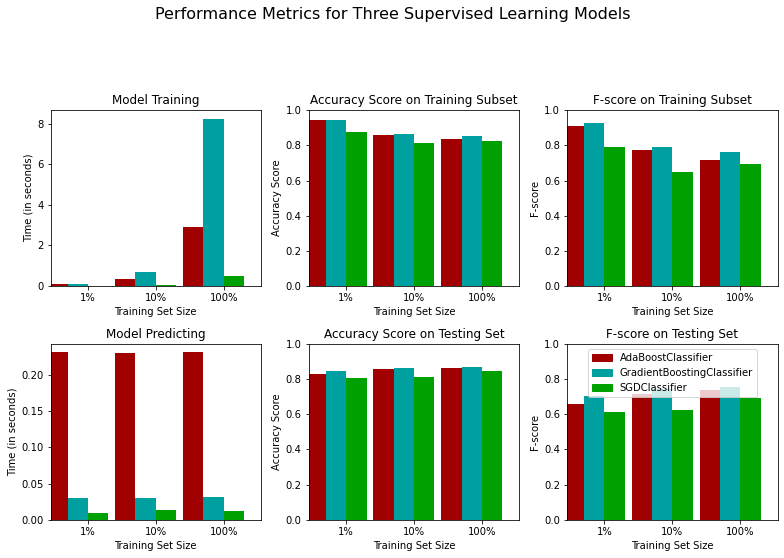

In [51]:
#27
#testing 3 algorithms

#AdaBoostClassifier
#GradientBoostingClassifier
#SGDClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

clf_A = AdaBoostClassifier(random_state=0)
clf_B = GradientBoostingClassifier(random_state=0)
clf_C = SGDClassifier(random_state=0)

samples_100 = int(len(y_train))    #100 percent
samples_10 = int(len(y_train) * 0.1)    #10 percent
samples_1 = int(len(y_train) * 0.01)    #1 percent
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
#show graphs
vs.evaluate(results)

##### #28
#### a.
SGDClassifier is the fastest algorithms to train (green bar on top left graph shows SGDClassifier has shortest time)

#### b.
GradientBoostingClassifier (blue bar) shows it has the best predicting accuracy and F-score on 100% testing set
which means it had scored well during all tests, also it scored better on 1% which means if we have small data to test 
GradientBoostingClassifier will have a chance to serve us the best prediction results


<h3 style="color:orange"> Clustering </h3>

In [52]:
#29
clstr_data = features_final.head(10000)    #clustering data

In [53]:
#clustering GMM
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


#find best silhouette_score for GMM from 2 to 7
score=0
lastHighScore = score
bestGmm = 0
for i in range(2,8):    #KMeans 2 to 7
    gmm = GaussianMixture(n_components=i)
    gmm.fit(clstr_data)
    y_gmm = gmm.predict(clstr_data)
    centers = gmm.means_
    score = silhouette_score(clstr_data,y_gmm)
    print("GMM:", i, " - silhouette_score: ", score)
    if (score>lastHighScore):    #get max score
        lastHighScore = score
        bestGmm = i


GMM: 2  - silhouette_score:  0.16346510737542397
GMM: 3  - silhouette_score:  0.09311966927680677
GMM: 4  - silhouette_score:  0.1113360422068843
GMM: 5  - silhouette_score:  0.08519409759187103
GMM: 6  - silhouette_score:  0.08982392269450341
GMM: 7  - silhouette_score:  0.05791667085903909


In [54]:
print("Best silhouette score we got when GMM used was", bestGmm , "components")    #print best GMM result

Best silhouette score we got when GMM used was 2 components


In [55]:
#30
#clustering KMeans
from sklearn.cluster import KMeans

In [56]:
#find best silhouette_score from KMeans 2 to 7
score=0
lastHighScore = score
bestKMeans = 0
for i in range(2,8):    #KMeans 2 to 7
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(clstr_data)
    y_kmeans = kmeans.predict(clstr_data)
    centers = kmeans.cluster_centers_
    score = silhouette_score(clstr_data,kmeans.labels_,metric='euclidean')
    print("KMeans:", i, " - silhouette_score: ", score)
    if (score>lastHighScore):    #get max score
        lastHighScore = score
        bestKMeans = i
        

KMeans: 2  - silhouette_score:  0.16359349252900543
KMeans: 3  - silhouette_score:  0.16470528226679215
KMeans: 4  - silhouette_score:  0.15929204756637247
KMeans: 5  - silhouette_score:  0.10984754488441424
KMeans: 6  - silhouette_score:  0.17519433570881593
KMeans: 7  - silhouette_score:  0.09855373121252504


In [57]:
print("Best silhouette score we got when Kmeans was", bestKMeans)    #print best KMeans result

Best silhouette score we got when Kmeans was 6
